In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers, models

In [14]:
(training_images,training_labels),(testing_images,testing_labels)=datasets.cifar10.load_data()

In [15]:
## Normalize so that pixel values are between 0 and 1.
training_images=training_images/255
testing_images=testing_images/255

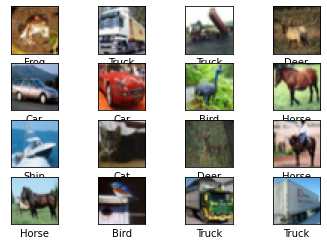

In [16]:
# Labelling and Visualizing first 16 images:
class_names=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [17]:
# Reduce the number of images used for training and testing.
training_images=training_images[:20000]
training_labels=training_labels[:20000]
testing_images=training_images[:4000]
testing_labels=training_labels[:4000]

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) ## 32 filters of height 3 and weight 3 that convolve (reverse and shift) across the image
model.add(layers.MaxPooling2D((2,2))) ## Gets max value after convulution
model.add(layers.Conv2D(64,(3,3),activation='relu'))  
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten()) # For softmax
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax')) # Because 10 labels


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy') 
model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))

Epoch 1/10
625/625 [==============================] - 14s 22ms/step - loss: 1.7623 - accuracy: 0.3493 - val_loss: 1.4942 - val_accuracy: 0.4485
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 1.3880 - accuracy: 0.4972 - val_loss: 1.2395 - val_accuracy: 0.5667
Epoch 3/10
625/625 [==============================] - 13s 21ms/step - loss: 1.2322 - accuracy: 0.5641 - val_loss: 1.1167 - val_accuracy: 0.6058
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 1.1296 - accuracy: 0.6012 - val_loss: 1.0223 - val_accuracy: 0.6365
Epoch 5/10
625/625 [==============================] - 16s 26ms/step - loss: 1.0404 - accuracy: 0.6328 - val_loss: 0.9162 - val_accuracy: 0.6752
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 0.9733 - accuracy: 0.6560 - val_loss: 0.8548 - val_accuracy: 0.6977
Epoch 7/10
625/625 [==============================] - 13s 20ms/step - loss: 0.9138 - accuracy: 0.6791 - val_loss: 0.8161 - val_accuracy:

In [19]:
# Test and save model

loss,accuracy = model.evaluate(testing_images,testing_labels)
print(f"Loss:{loss}")
print(f"Loss:{accuracy}")

model.save('image_classifier.model')

125/125 [==============================] - 1s 8ms/step - loss: 0.6290 - accuracy: 0.7837
Loss:0.6290158629417419
Loss:0.7837499976158142
INFO:tensorflow:Assets written to: image_classifier.model\assets


Prediction is Horse


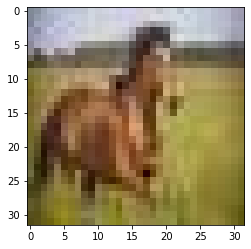

In [21]:
img= cv.imread('pictures/horse.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')